# Проект по SQL

# описание проекта

Коронавирус застал мир врасплох, изменив привычный порядок вещей. На какое-то время жители городов перестали выходить на улицу, посещать кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.
Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

Цель исследования: анализ базы данных для компании

Задачи
* Посчитайте, сколько книг вышло после 1 января 2000 года;
* Для каждой книги посчитайте количество обзоров и среднюю оценку;
* Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
* Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
* Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

# Схема данных

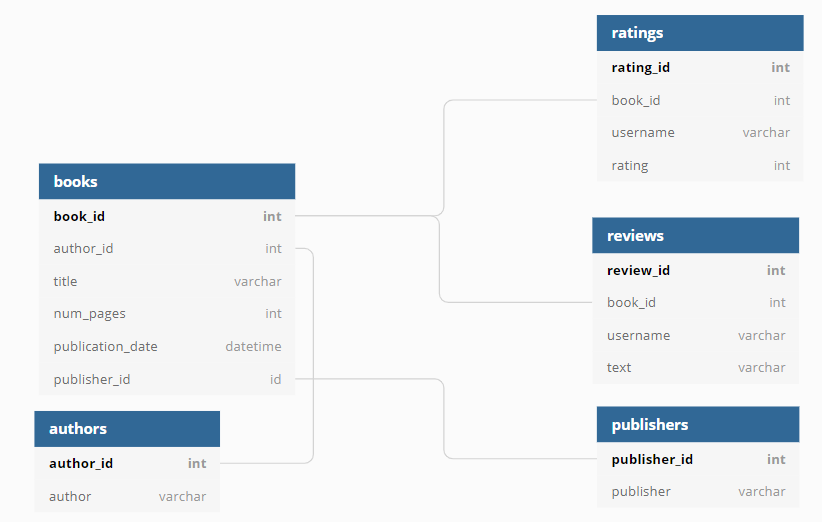

## Подключение к базе данных

In [1]:
import pandas as pd 
from sqlalchemy import text, create_engine 

In [2]:
# устанавливаем параметры 
db_config = {'user': 'praktikum_student', # имя пользователя 
'pwd': 'Sdf4$2;d-d30pp', # пароль 
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net', 
'port': 6432, # порт подключения 
'db': 'data-analyst-final-project-db'} # название базы данных 
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config) 

# сохраняем коннектор 
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 
con=engine.connect()

## Исследование таблиц

In [3]:
query = '''SELECT * FROM books''' 
books = pd.io.sql.read_sql(sql=text(query), con = con)
print('Количество дубликатов: ', books.duplicated().sum(), '\n')
print('Количество пропусков:\n', books.isna().sum(), '\n')
display(books.info())
books.head()

Количество дубликатов:  0 

Количество пропусков:
 book_id             0
author_id           0
title               0
num_pages           0
publication_date    0
publisher_id        0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


None

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


Таблица о книгах не содержит полных дубликатов, не имеет пропусков, однако тип данных publication_date не соответствует правильному. Изменим тип на datetime 64

In [4]:
books['publication_date'] = pd.to_datetime(books['publication_date'])

In [5]:
query = '''SELECT * FROM authors''' 
authors = pd.io.sql.read_sql(sql=text(query), con = con)
print('Количество дубликатов: ', authors.duplicated().sum())
print('Количество пропусков:\n', authors.isna().sum(), '\n')
display(authors.info())
authors.head()

Количество дубликатов:  0
Количество пропусков:
 author_id    0
author       0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


None

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


Таблица о авторах не имеет явных дубликатов и пропусков. Типы данных приведены адекватно

In [6]:
query = '''SELECT * FROM reviews''' 
reviews = pd.io.sql.read_sql(sql=text(query), con = con)
print('Количество дубликатов: ', reviews.duplicated().sum())
print('Количество пропусков:\n', reviews.isna().sum(), '\n')
display(reviews.info())
reviews.head()

Количество дубликатов:  0
Количество пропусков:
 review_id    0
book_id      0
username     0
text         0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


None

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


Таблица о ревью не имеет явных дубликатов и пропусков. Типы данных приведены адекватно

In [7]:
query = '''SELECT * FROM publishers''' 
publishers = pd.io.sql.read_sql(sql=text(query), con = con)
print('Количество дубликатов: ', publishers.duplicated().sum())
print('Количество пропусков:\n', publishers.isna().sum(), '\n')
display(publishers.info())
publishers.head()

Количество дубликатов:  0
Количество пропусков:
 publisher_id    0
publisher       0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


None

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


Таблица о издателях не имеет явных дубликатов и пропусков. Типы данных приведены адекватно

In [8]:
query = '''SELECT * FROM ratings''' 
ratings = pd.io.sql.read_sql(sql=text(query), con = con)
print('Количество дубликатов: ', ratings.duplicated().sum())
print('Количество пропусков:\n', ratings.isna().sum(), '\n')
display(ratings.info())
ratings.head()

Количество дубликатов:  0
Количество пропусков:
 rating_id    0
book_id      0
username     0
rating       0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


None

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


Таблица о рейтингах не имеет явных дубликатов и пропусков. Типы данных приведены адекватно

## Выполнение задач

### сколько книг вышло после 1 января 2000 года

In [9]:
query = '''
            SELECT COUNT(title) AS books_count
            FROM
                books
            WHERE publication_date >= '2000-01-01';
        ''' 
pd.io.sql.read_sql(sql=text(query), con = con)

,books_count
0,821


Всего после 1 января 2000 года вышла 821 книга

### Для каждой книги посчитайте количество обзоров и среднюю оценку

In [10]:
query = '''
            SELECT bk.book_id AS id, bk.title AS book_title, AVG(rat.rating) AS avg_rating,
            COUNT( DISTINCT rev.review_id) AS review_count  
            FROM books AS bk  LEFT JOIN ratings AS rat ON rat.book_id = bk.book_id
            LEFT JOIN reviews AS rev ON rat.book_id = rev.book_id
            GROUP BY book_title, id
            ORDER BY avg_rating  DESC, review_count DESC
            
'''
pd.io.sql.read_sql(sql=text(query), con = con)

,id,book_title,avg_rating,review_count
0,17,A Dirty Job (Grim Reaper #1),5.00,4
1,553,School's Out—Forever (Maximum Ride #2),5.00,3
2,444,Moneyball: The Art of Winning an Unfair Game,5.00,3
3,86,Arrows of the Queen (Heralds of Valdemar #1),5.00,2
4,972,Wherever You Go There You Are: Mindfulness Me...,5.00,2
...,...,...,...,...
995,915,The World Is Flat: A Brief History of the Twen...,2.25,3
996,202,Drowning Ruth,2.00,3
997,316,His Excellency: George Washington,2.00,2
998,371,Junky,2.00,2


Выведем средние рейтинги и количество ревью у каждой книги. На первом месте по сортировке на основе среднего рейтинга и ревью стоит книга A Dirty Job (Grim Reaper #1)	

### Определите издательство, которое выпустило наибольшее число книг толще 50 страниц

In [11]:
query = '''
        SELECT pb.publisher, COUNT(DISTINCT bk.book_id) AS count_book
        FROM books AS bk  INNER JOIN publishers AS pb ON bk.publisher_id = pb.publisher_id
        WHERE bk.num_pages > 50
        GROUP BY pb.publisher
        ORDER BY count_book DESC
        LIMIT 1
'''
pd.io.sql.read_sql(sql=text(query), con = con)

,publisher,count_book
0,Penguin Books,42


Выведем издание которое больше всех выпустило книг со страницами больше 50. Название издания Penguin Books, всего книг 42

### Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [12]:
query = '''SELECT
            at.author AS author,
            AVG(rt.rating) AS avg_rating,
            COUNT(rt.rating) AS count_rating
            FROM authors AS at
            INNER JOIN books AS bk ON bk.author_id = at.author_id
            INNER JOIN ratings AS rt ON rt.book_id = bk.book_id
            WHERE bk.book_id IN (SELECT  book_id
                                 FROM ratings
                                 GROUP BY book_id
                                 HAVING COUNT(rating) >= 50)
            GROUP BY author 
            ORDER BY avg_rating DESC
            LIMIT 1
'''
pd.io.sql.read_sql(sql=text(query), con = con)

,author,avg_rating,count_rating
0,J.K. Rowling/Mary GrandPré,4.287097,310


In [13]:
query ='''SELECT 
    at.author,
    AVG(book_avg.avg_rating) AS author_avg_rating,
    COUNT(bk.book_id)
FROM 
    authors AS at
INNER JOIN 
    books AS bk ON at.author_id = bk.author_id
INNER JOIN 
    (
        SELECT 
            book_id, 
            AVG(rating) AS avg_rating
        FROM 
            ratings
        GROUP BY 
            book_id
        HAVING 
            COUNT(rating_id) >= 50
    ) AS book_avg ON bk.book_id = book_avg.book_id
GROUP BY 
    at.author
ORDER BY 
    author_avg_rating DESC
LIMIT 1;'''
pd.io.sql.read_sql(sql=text(query), con = con)

,author,author_avg_rating,count
0,J.K. Rowling/Mary GrandPré,4.283844,4


Существует возможность посчитать среднее путем усреднения всех оценок автора, либо же найти среднее оценок каждой книги автора и усреднять по ним. Из-за этого будет немного различаться конечное среднее, в случае подхода подсчета по всем оценкам 4.287, а по каждой книге 4.283. В любом случае первое место займет J.K. Rowling

### Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

In [14]:
query = '''
WITH count_review AS (SELECT rv.username, COUNT(rv.review_id) AS counts
                      FROM reviews AS rv 
                      WHERE rv.username IN (SELECT username
                                            FROM ratings
                                            GROUP BY username
                                            HAVING COUNT(rating_id) > 48)
                      GROUP BY rv.username)
SELECT AVG(cr.counts)
FROM count_review AS cr
'''
pd.io.sql.read_sql(sql=text(query), con = con)

,avg
0,24.0


Среднее количество обзоров пользователей, который поставили больше 48 оценок равно 24.

# Вывод

В результате данной работы мы определили:
* после 1 января 2000 года вышла 821 книга
* для каждой книги посчитали количество обзоров и средний рейтинг. Наиболее высокооцененная и с найбольшим количеством обзоров книга A Dirty Job (Grim Reaper #1)
* Нашли издательство Penguin Books, выпустило книг 42 с количеством страниц больше 50
* Автор с самой высокой средней оценкой J.K Rowling с средним баллом 4.28 и количеством рейтингов 310
* Среднее количество обзоров пользователей, который поставили больше 48 оценок равно 24.

В целом стоит сконцентрировать внимание на книгах с наибольшим рейтингом и количеством обзоров, это поможет найти наиболее перспективные для клиентов книги